In [87]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


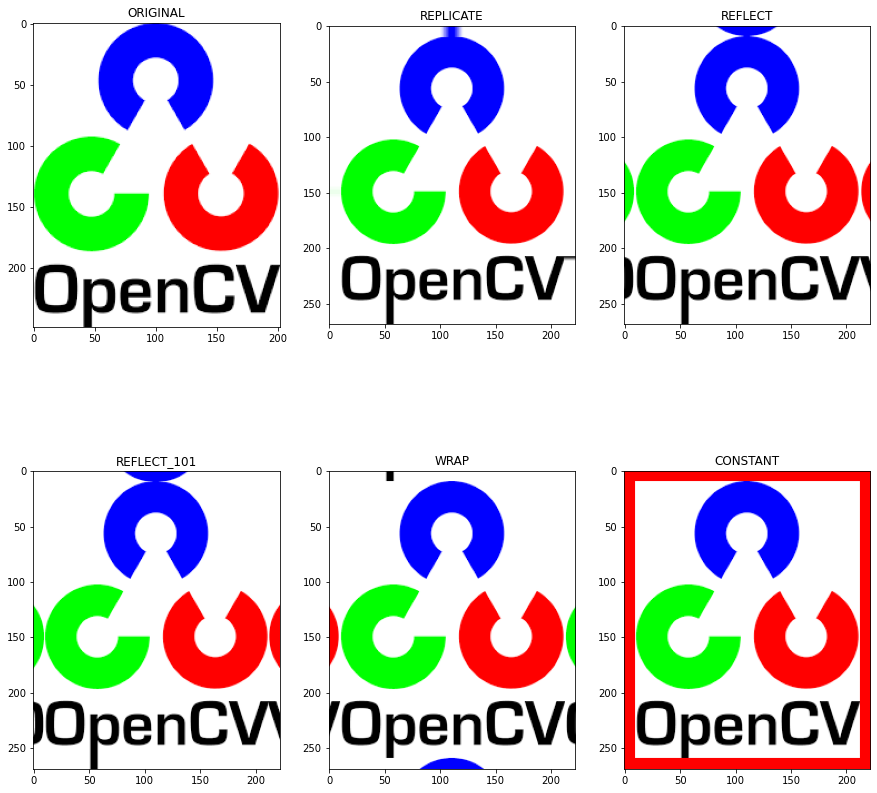

In [88]:
BLUE = [255,0,0]
img1 = cv2.imread('opencv_logo.png')
replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)
plt.figure(figsize=(15,15))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [89]:
250+10

260

In [90]:
x = np.uint8([250]) #unsigned integer 8bit 0-255  / integer 8bit -126~125

In [91]:
y= np.uint8([10])

In [92]:
x+y

array([4], dtype=uint8)

In [93]:
print(x+y)

[4]


In [94]:
print(cv2.add(x,y))

[[255]]


In [95]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

In [96]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [97]:
def nothing(x):
    pass

In [98]:
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('weight','image',0,100,nothing)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    # get current positions of four trackbars
    weight = cv2.getTrackbarPos('weight','image')
    dst = cv2.addWeighted(img1,weight/100.,img2,1.-weight/100.,0)
        
cv2.destroyAllWindows()

In [99]:
img = np.zeros((400,512,3), np.uint8)
for i in range(255):
    img[:,i]=i
    img[:,256+i]=255-i

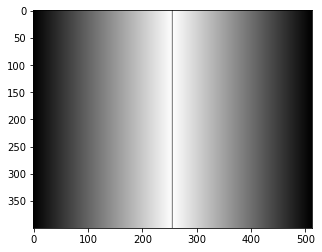

In [100]:
plt.imshow(img)
plt.show()

In [101]:
ret, mask = cv2.threshold(img, 50, 250, cv2.THRESH_BINARY)

In [102]:
ret

50.0

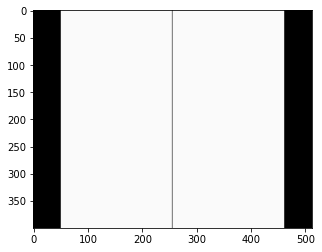

In [103]:
plt.imshow(mask)
plt.show()

In [104]:
mask_inv = cv2.bitwise_not(mask) #00000000(0)->11111111(255) 00001000(8) ->11110111(247)

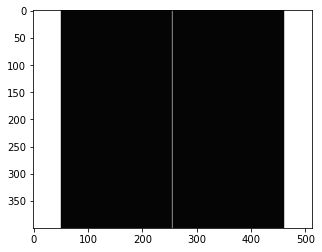

In [105]:
plt.imshow(mask_inv)
plt.show()

In [167]:
img1 = cv2.imread('ml.jpg')
img2 = cv2.imread('opencv.png')

In [168]:
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

In [169]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 150, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

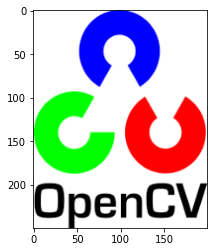

In [170]:
plt.imshow(img2)
plt.show()

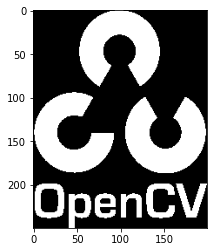

In [171]:
plt.imshow(mask_inv,cmap='gray')
plt.show()

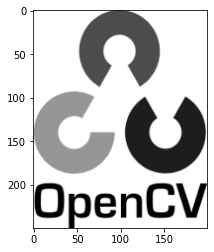

In [172]:
plt.imshow(img2gray,cmap='gray')
plt.show()

In [173]:
img2gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

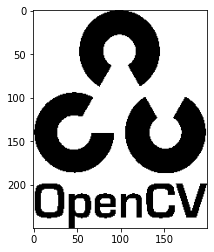

In [174]:
plt.imshow(mask,cmap='gray')
plt.show()

In [175]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

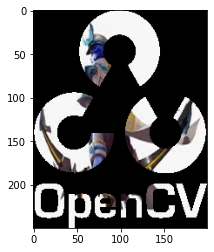

In [176]:
plt.imshow(img1_bg,cmap='gray')
plt.show()

In [177]:
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

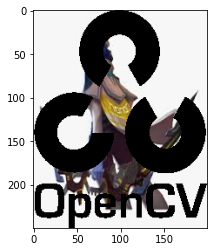

In [178]:
plt.imshow(img1_bg,cmap='gray')
plt.show()

In [179]:
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

In [180]:
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

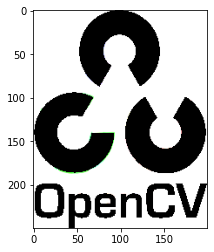

In [183]:
plt.imshow(img1,cmap='gray')
plt.show()